# import libiraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Attribute Information:

1.age

2.sex (1= Male, 0= Female)

3.chest pain type (4 values)

4.resting blood pressure

5.serum cholestoral in mg/dl 

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by flourosopy

13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

# read data

In [2]:
df= pd.read_csv("C:/Users/azzaa/Downloads/archive (1)/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

# EDA

In [4]:
cat_values = []
conti_values = []

for col in df.columns:
    if len(df[col].unique()) >= 10:
        conti_values.append(col)
    else:
        cat_values.append(col)
        
print("catageroy values: ", cat_values)
print("continous values: ", conti_values)

catageroy values:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous values:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


how many people have heart disease (label = 1)

In [7]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0, 0.5, 'Amount')

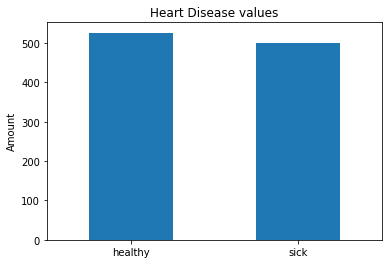

In [8]:
#plotting bar chart.
fig = df.target.value_counts().plot(kind = 'bar')
fig.set_xticklabels(labels=['healthy','sick'], rotation=0)
plt.title("Heart Disease values")
plt.ylabel("Amount")

balanced data

In [9]:
#Showing if there are any null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there is no nulls

In [10]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

==> 713 records are of males and 312 records are of females

<AxesSubplot:>

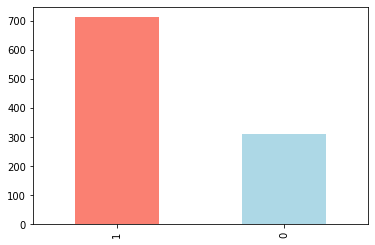

In [11]:
df['sex'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [12]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


1 > MALE  , 0 > FMALE
1 > HAVE DISEASE  , 0 > DOEN'T HAVE DISEASE

# LET'S PLOT THIS !

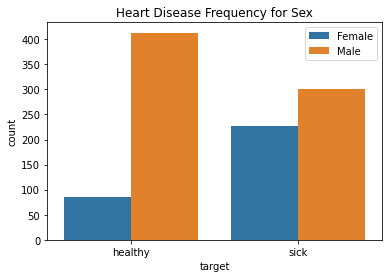

In [13]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=['healthy','sick'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

# which sex has which type of chest pain most?

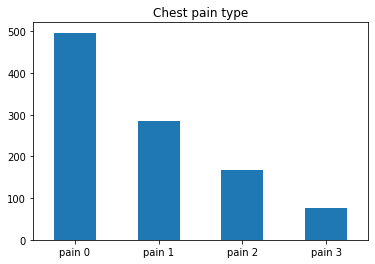

In [14]:
#plotting a bar chart
fig = df.cp.value_counts().plot(kind = 'bar')
fig.set_xticklabels(labels=['pain 0', 'pain 1', 'pain 2', 'pain 3'], rotation=0)
plt.title('Chest pain type');

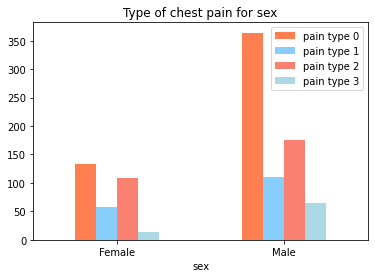

In [15]:
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue','salmon', 'lightblue'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

# which chest pain are most pron to have heart disease?

cp: chest pain

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

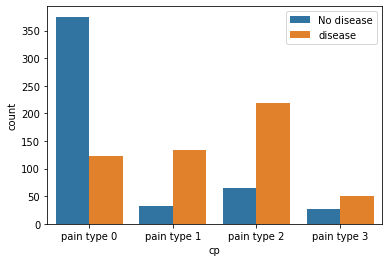

In [16]:
fig = sns.countplot(x = 'cp', data = df, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

<AxesSubplot:>

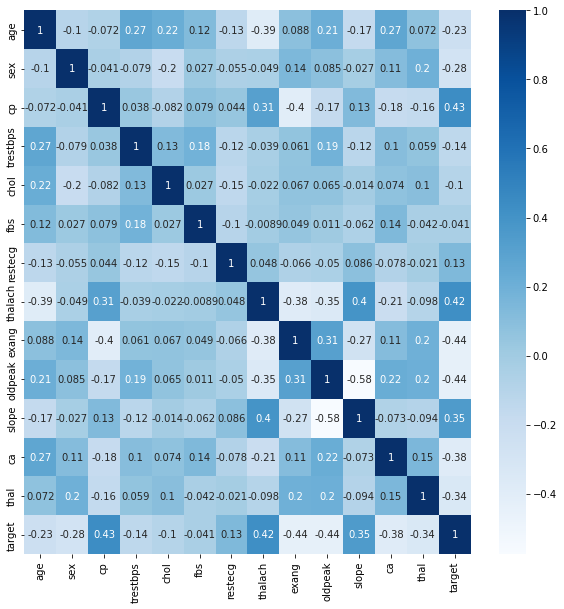

In [17]:
plt.figure(figsize=(10,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap='Blues')

There are Four features( cp, restecg, thalach, slope ) are positively correlated with the target . 

Rest of the features are negatively correlated with target but none of them found to be strongly correlated with target.

**the greater amount of chest pain results in a greater chance of having heart disease so the positive correlation between chest pain (cp) & target This makes sense .

**the negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.

# Skewness

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

In [18]:
## skewness 
df.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

In [19]:
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# distribution of numerical features

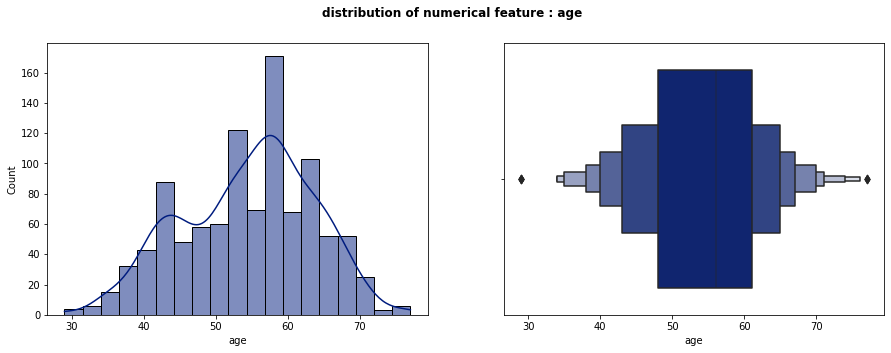

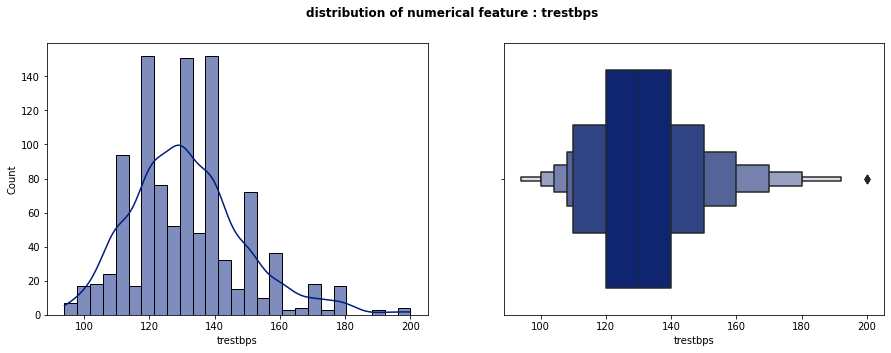

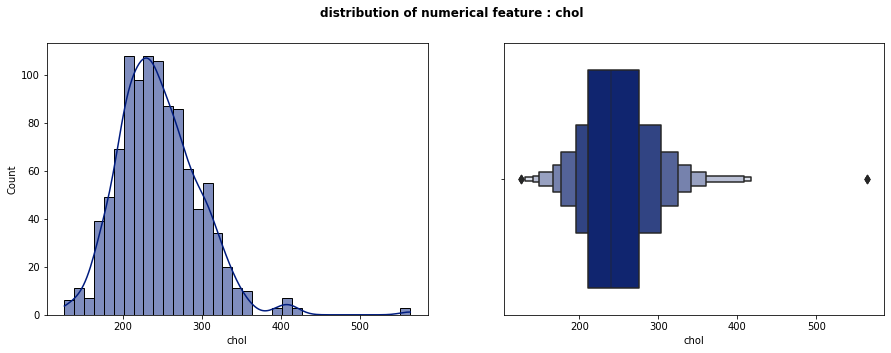

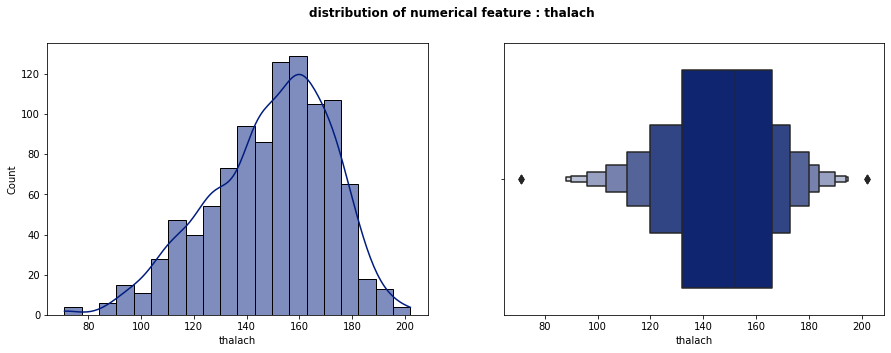

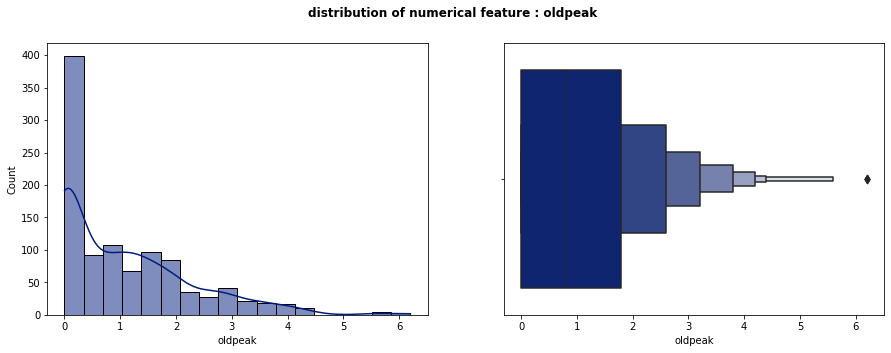

In [20]:
for feature in numerical_features:
    plt.figure(figsize=(15,5))
    plt.suptitle('distribution of numerical feature : {}'.format(feature) , fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=feature , kde=True )
    plt.subplot(1,2,2)
    sns.boxenplot(data=df , x=feature,linewidth=1.5)

# chcek outliers

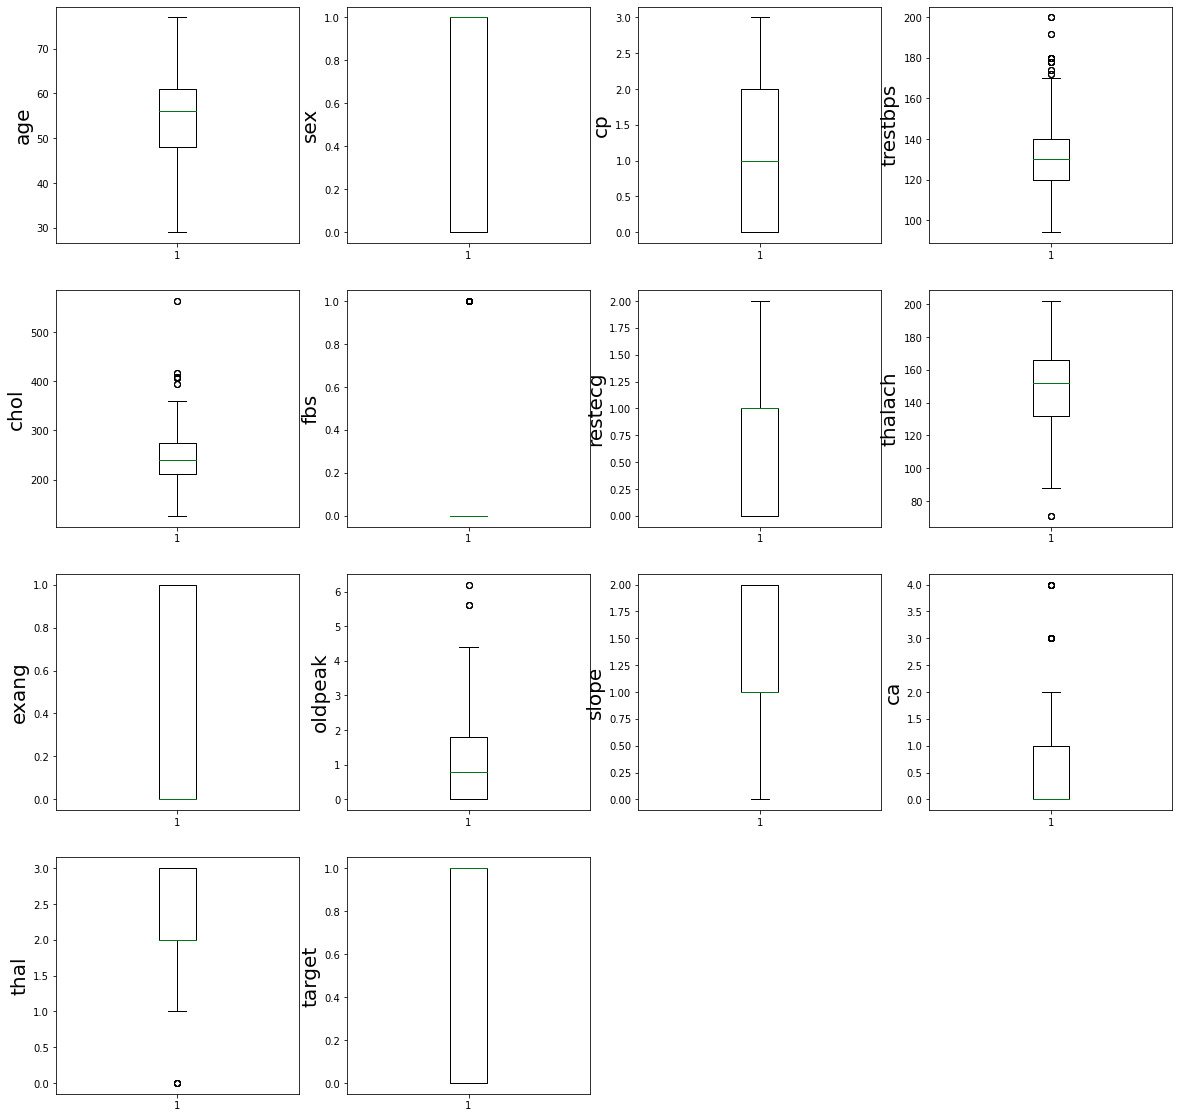

In [21]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in df.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(df[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()


we can see that there are many outliers in the column trestbps,chol,ca,thalach,oldpeak

# remove outliers

In [22]:
#Removing outliers 

outlier=['chol','ca','oldpeak','trestbps']
for i in outlier:
    q3=df[i].quantile(q=0.75)
    q1=df[i].quantile(q=0.25)
    IQR=q3-q1
    IQR_lower_limit=int(q1-1.5*IQR)
    IQR_upper_limit=int(q3+1.5*IQR)
    k=df[df[i]>IQR_upper_limit]
    df=df[df[i]<IQR_upper_limit]

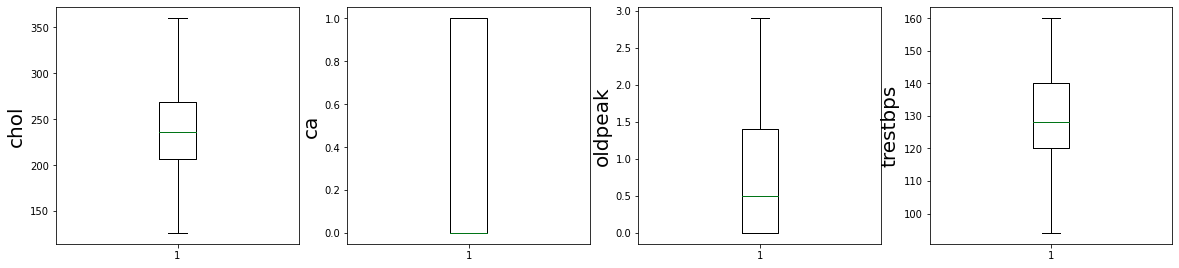

In [23]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in outlier:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(df[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# split the target column

In [25]:
x = df.drop(columns = ["target"])
y = df["target"]

# split the data into train and test set

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1234)

# modelling

# 1-  Random Forest

In [27]:
RF= RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred)
c_mat= confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        86

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



In [28]:
print("Accuracy: %.2f%%" % (rf_accuracy*100))

Accuracy: 100.00%


c:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


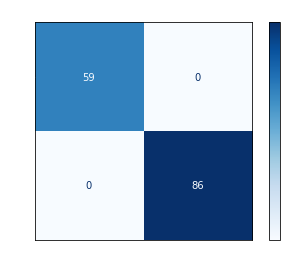

In [29]:
 from sklearn.metrics import plot_confusion_matrix

color = 'white'
matrix = plot_confusion_matrix(RF, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# 2 - SVM

# scaling data 

In [30]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [31]:
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1234)

In [32]:
model= SVC()
model.fit(x_scaled_train,y_train)
y_pred = model.predict(x_scaled_test)
sv_accuracy = accuracy_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        86

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



In [33]:
print("Accuracy: %.2f%%" % (sv_accuracy*100))

Accuracy: 100.00%


c:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


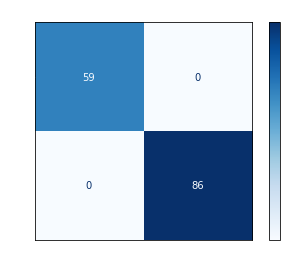

In [34]:

 
color = 'white'
matrix = plot_confusion_matrix(model, x_scaled_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# 3 - LogisticRegression

In [35]:
log_reg = LogisticRegression()
log_reg.fit(x_scaled_train, y_train)
y_pred = log_reg.predict(x_scaled_test)
lr_acc = accuracy_score(y_test, y_pred)

In [36]:
print("Accuracy: %.2f%%" % (lr_acc*100))

Accuracy: 100.00%


# Evaluation

In [37]:
Evaluation = pd.DataFrame({'Model': ['Random Forest',"Support Vector Machine","Logistic Regression"], 
                          'Accuracy': [rf_accuracy*100,sv_accuracy*100,lr_acc*100]})
Evaluation

,Model,Accuracy
0,Random Forest,100.0
1,Support Vector Machine,100.0
2,Logistic Regression,100.0


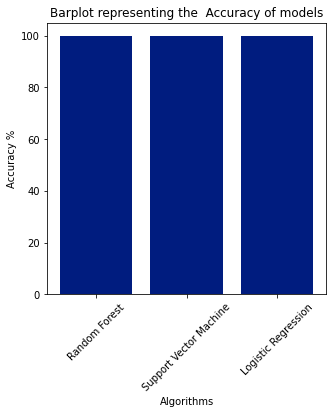

In [39]:
plt.figure(figsize=(5,5))
plt.title("Barplot representing the  Accuracy of models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(Evaluation['Model'],Evaluation['Accuracy'])
plt.xticks(rotation = 45)
plt.show()